# The Keras Functional API
> In this chapter, you'll become familiar with the basics of the Keras functional API. You'll build a simple functional network using functional building blocks, fit it to data, and make predictions. This is the Summary of lecture "Advanced Deep Learning with Keras", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow-Keras, Deep_Learning]
- image: 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## Keras input and dense layers
- Inputs and outputs
    - Input layer
    - Output layer

### Input layers
The first step in creating a neural network model is to define the Input layer. This layer takes in raw data, usually in the form of numpy arrays. The shape of the Input layer defines how many variables your neural network will use. For example, if the input data has 10 columns, you define an Input layer with a shape of `(10,)`.

In this case, you are only using one input in your network.

In [2]:
from tensorflow.keras.layers import Input

# Create an input layer of shape 1
input_tensor = Input(shape=(1, ))

### Dense layers
Once you have an Input layer, the next step is to add a Dense layer.

Dense layers learn a weight matrix, where the first dimension of the matrix is the dimension of the input data, and the second dimension is the dimension of the output data. Recall that your Input layer has a shape of 1. In this case, your output layer will also have a shape of 1. This means that the Dense layer will learn a 1x1 weight matrix.

In this exercise, you will add a dense layer to your model, after the input layer.

In [3]:
from tensorflow.keras.layers import Dense

# Input layer
input_tensor = Input(shape=(1, ))

# Dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

### Output layers
Output layers are simply Dense layers! Output layers are used to reduce the dimension of the inputs to the dimension of the outputs. You'll learn more about output dimensions in chapter 4, but for now, you'll always use a single output in your neural networks, which is equivalent to `Dense(1)` or a dense layer with a single unit.

In [4]:
# Input layer
input_tensor = Input(shape=(1, ))

# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(1)(input_tensor)

## Build and compile a model


### Build a model
Once you've defined an input layer and an output layer, you can build a Keras model. The model object is how you tell Keras where the model starts and stops: where data comes in and where predictions come out.



In [5]:
from tensorflow.keras.models import Model

input_tensor = Input(shape=(1, ))
output_tensor = Dense(1)(input_tensor)

# Built the model
model = Model(input_tensor, output_tensor)

### Compile a model
The final step in creating a model is compiling it. Now that you've created a model, you have to compile it before you can fit it to data. This finalizes your model, freezes all its settings, and prepares it to meet some data!

During compilation, you specify the optimizer to use for fitting the model to the data, and a loss function. `'adam'` is a good default optimizer to use, and will generally work well. Loss function depends on the problem at hand. Mean squared error is a common loss function and will optimize for predicting the mean, as is done in least squares regression.

Mean absolute error optimizes for the median and is used in quantile regression. For this dataset, `'mean_absolute_error'` works pretty well, so use it as your loss function.

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

### Visualize a model
Now that you've compiled the model, take a look a the result of your hard work! You can do this by looking at the model summary, as well as its plot.

The summary will tell you the names of the layers, as well as how many units they have and how many parameters are in the model.

> Note: Before using `plot_model`, you need to install pydot, pydotplus, and graphviz. After install them, restart the kernel.
```
sudo apt install graphviz
pip install pydot pydotplus graphviz
```

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


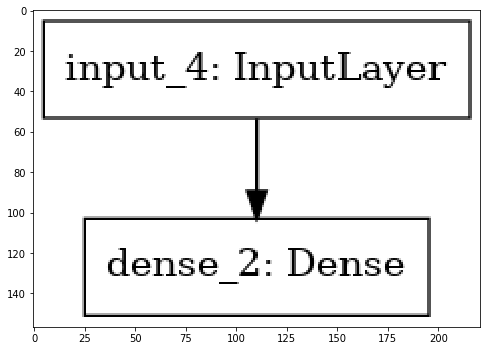

In [9]:
from tensorflow.keras.utils import plot_model

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='./model.png')

# Display the image
data = plt.imread('./model.png')
plt.imshow(data);

## Fit and evaluate a model
- Basketball Data
    - Goal: Predict tournament outcomes
    - Data Available: team ratings from the tournament organizers
- Input
    - Seed difference (`seed_diff`)
- Output
    - Score difference (`score_diff`)

### Fit the model to the tournament basketball data
Now that the model is compiled, you are ready to fit it to some data!

In this exercise, you'll use a dataset of scores from US College Basketball tournament games. Each row of the dataset has the team ids: `team_1` and `team_2`, as integers. It also has the seed difference between the teams (seeds are assigned by the tournament committee and represent a ranking of how strong the teams are) and the score difference of the game (e.g. if `team_1` wins by 5 points, the score difference is 5).

To fit the model, you provide a matrix of X variables (in this case one column: the seed difference) and a matrix of Y variables (in this case one column: the score difference).

In [10]:
games_tourney = pd.read_csv('./dataset/games_tourney.csv')
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [15]:
from sklearn.model_selection import train_test_split

games_tourney_train, games_tourney_test = train_test_split(games_tourney, test_size=0.3)

In [16]:
input_tensor = Input(shape=(1, ))
output_tensor = Dense(1)(input_tensor)

model = Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='mean_absolute_error')

In [17]:
# Now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1,
          batch_size=128,
          validation_split=0.1,
          verbose=True);

21/21 [==============================] - 0s 10ms/step - loss: 10.4738 - val_loss: 10.8846


### Evaluate the model on a test set
After fitting the model, you can evaluate it on new data. You will give the model a new `X` matrix (also called test data), allow it to make predictions, and then compare to the known `y` variable (also called target data).

In this case, you'll use data from the post-season tournament to evaluate your model. The tournament games happen after the regular season games you used to train our model, and are therefore a good evaluation of how well your model performs out-of-sample.

In [19]:
# Load the X variable from the test data
X_test = games_tourney_test['seed_diff']

# Load the y variable from the test data
y_test = games_tourney_test['score_diff']

# Evaluate the model on the test data
print(model.evaluate(X_test, y_test, verbose=False))

10.10069751739502
